In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
data=pd.read_csv(r'F:\Data_analytics_internship_task\assi_1.csv',encoding='utf-8')
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [59]:
print(f"the columns in dataset\n {data.columns}")
print("-"*65)
print(f"the shape before drop \t {data.shape}")
data=data.drop(['audience_type', 'creative_type','creative_name'],axis=1)

print(f"shape \t{data.shape}")

the columns in dataset
 Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')
-----------------------------------------------------------------
the shape before drop 	 (16834, 16)
shape 	(16834, 13)


In [61]:
# delete the duplicate values if any
duplicate=data.duplicated()
print(f"Number of duplicate values\t  {duplicate.sum()}")
print("-"*65)
print(f"shape before duplicate delete process\t{data.shape}")
data=data[~duplicate]
print(f"shape after duplicate delete process\t{data.shape}")
data
# dont need to delete the zero values here because no of cliks may be zero

Number of duplicate values	  0
-----------------------------------------------------------------
shape before duplicate delete process	(16083, 13)
shape after duplicate delete process	(16083, 13)


,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Desktop,18-24,53.31,10,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16829,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Mobile,25-34,19.88,36,15,0.0
16830,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Mobile,35-44,1.64,11,1,0.0
16831,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Mobile,45-54,0.00,3,0,0.0
16832,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Mobile,65 or more,0.00,3,0,0.0


In [30]:
data['campaign_platform'].value_counts()

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

In [32]:
data['campaign_type'].value_counts()

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64

In [33]:
data['communication_medium'].value_counts()

Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64

In [34]:
data['subchannel'].value_counts()

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64

In [106]:
data['age'].value_counts()

25-34           3045
35-44           2760
Undetermined    2555
18-24           2454
45-54           2292
65 or more      1510
55-64           1467
Name: age, dtype: int64

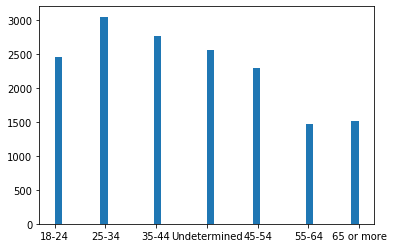

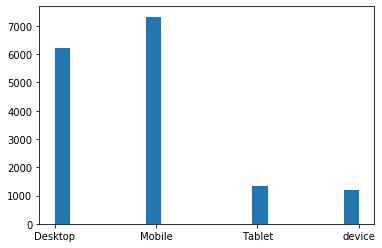

In [71]:
#hitogram for age column
plt.hist(data['age'],bins=40)
plt.show()
plt.hist(data['device'],bins=20)
plt.show()
#shows the age group between the 5-44 shows more and they are using the mobile phone to shope

In [87]:
device=data.groupby(['age','campaign_platform']).count()
device
# using this we can come to know the age group 25-64 are only use the facebook the groups 18-24 adn 65and more not using fackbook adds

Date  product  phase  campaign_type  \
age          campaign_platform                                        
18-24        Google Ads         2454     2454   2454           2454   
25-34        Facebook Ads        458      458    458            458   
             Google Ads         2587     2587   2587           2587   
35-44        Facebook Ads        388      388    388            388   
             Google Ads         2372     2372   2372           2372   
45-54        Facebook Ads        294      294    294            294   
             Google Ads         1998     1998   1998           1998   
55-64        Facebook Ads         47       47     47             47   
             Google Ads         1420     1420   1420           1420   
65 or more   Google Ads         1510     1510   1510           1510   
Undetermined Google Ads         2555     2555   2555           2555   

                                communication_medium  subchannel  device  \
age          campaign_platform                                             
18-24        Google Ads                         2454        2454    2454   
25-34        Facebook Ads                        458         458     458   
             Google Ads                         2587        2587    2587   
35-44        Facebook Ads                        388         388     388   
             Google Ads                         2372        2372    2372   
45-54        Facebook Ads                        294         294     294   
             Google Ads                         1998        1998    1998   
55-64        Facebook Ads                         47          47      47   
             Google Ads                         1420        1420    1420   
65 or more   Google Ads                         1510        1510    1510   
Undetermined Google Ads                         2555        2555    2555   

                                spends  impressions  clicks  link_clicks  
age          campaign_platform                                            
18-24        Google Ads           2454         2454    2454         2454  
25-34        Facebook Ads          458          458     458          458  
             Google Ads           2587         2587    2587         2587  
35-44        Facebook Ads          388          388     388          388  
             Google Ads           2372         2372    2372         2372  
45-54        Facebook Ads          294          294     294          294  
             Google Ads           1998         1998    1998         1998  
55-64        Facebook Ads           47           47      47           47  
             Google Ads           1420         1420    1420         1420  
65 or more   Google Ads           1510         1510    1510         1510  
Undetermined Google Ads           2555         2555    2555         2555

In [90]:
data.corr()

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744820,0.837803,0.697232
impressions,0.744820,1.000000,0.917925,0.963102
clicks,0.837803,0.917925,1.000000,0.925701
link_clicks,0.697232,0.963102,0.925701,1.000000


Text(0, 0.5, 'spends on each purchase')

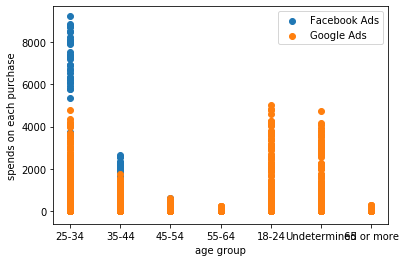

In [101]:
group=data.groupby('campaign_platform')
for name,gro in group:
    plt.scatter(gro['age'],gro['spends'],label=name)
plt.legend()
plt.xlabel('age group')
plt.ylabel('spends on each purchase')

In [102]:
### finally the age group between 25-34 using the facebook and spends more

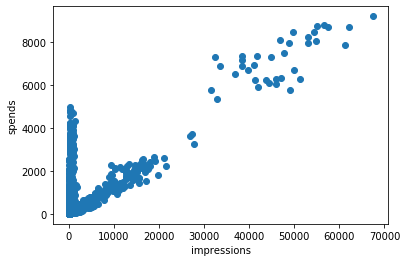

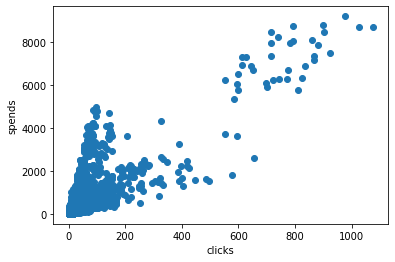

In [122]:
def scatter_linearitY(col):
    plt.scatter(y=data['spends'],x=data[col])
    plt.xlabel(col)
    plt.ylabel('spends')
    plt.show()

scatter_linearitY('impressions')
scatter_linearitY('clicks')

In [125]:
# train a regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [167]:
X=data.drop(['spends','Date','product', 'phase', 'campaign_type','communication_medium'],axis=1)
y=data['spends'].copy()
X

,campaign_platform,subchannel,device,age,impressions,clicks,link_clicks
0,Google Ads,Brand,Desktop,18-24,2,0,0.0
1,Google Ads,Brand,Desktop,25-34,5,0,0.0
2,Google Ads,Brand,Desktop,35-44,1,0,0.0
3,Google Ads,Brand,Desktop,Undetermined,5,3,0.0
4,Google Ads,Brand,Desktop,18-24,10,2,0.0
...,...,...,...,...,...,...,...
16829,Google Ads,Brand,Mobile,25-34,36,15,0.0
16830,Google Ads,Brand,Mobile,35-44,11,1,0.0
16831,Google Ads,Brand,Mobile,45-54,3,0,0.0
16832,Google Ads,Brand,Mobile,65 or more,3,0,0.0


In [169]:
# convert the catagorical value to numerical 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
for i in [0,1,2,3]:
    X.iloc[:,i] = labelencoder_X.fit_transform(X.iloc[:,i])
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3])
X = onehotencoder.fit_transform(X).toarray()
X=pd.DataFrame(X)
X

E:\annaconda\installed_files\lib\site-packages\sklearn\preprocessing\_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\annaconda\installed_files\lib\site-packages\sklearn\preprocessing\_encoders.py:450: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0,15.0,0.0
16079,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0
16080,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0
16081,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0


In [201]:
#normaliz the model
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(X)
x

array([[ 0.28228677, -0.28228677, -0.28228677, ..., -0.11930606,
        -0.27379003, -0.11706947],
       [ 0.28228677, -0.28228677, -0.28228677, ..., -0.11810611,
        -0.27379003, -0.11706947],
       [ 0.28228677, -0.28228677, -0.28228677, ..., -0.11970605,
        -0.27379003, -0.11706947],
       ...,
       [ 0.28228677, -0.28228677, -0.28228677, ..., -0.11890608,
        -0.27379003, -0.11706947],
       [ 0.28228677, -0.28228677, -0.28228677, ..., -0.11890608,
        -0.27379003, -0.11706947],
       [ 0.28228677, -0.28228677, -0.28228677, ..., -0.11450624,
        -0.25193472, -0.11706947]])

In [196]:
#spli the train and test values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [197]:
X_train.shape

(12866, 24)

In [198]:
y_test.shape

(3217,)

In [199]:
# train the regression model
reg=LinearRegression()
reg.fit(X_train,y_train)

#make prediction
y_predic=reg.predict(X_test)

In [200]:
# evaluating the model
print(f"Mean absoluate error \t {mean_absolute_error(y_test,y_predic)}")
print(f"Mean square error \t {mean_squared_error(y_test,y_predic)}")
print(f"Root Mean square error \t {np.sqrt(mean_squared_error(y_test,y_predic))}")


Mean absoluate error 	 101.220357086914
Mean square error 	 58847.5565354995
Root Mean square error 	 242.5851531637901


In [223]:
# the ensemple models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
ren=RandomForestRegressor()

param={'n_estimators':[60,100,200],'max_depth':[10,12,15],}
grid=GridSearchCV(ren,param_grid=param,cv=4)
grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 12, 15],
    

In [226]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [227]:
grid.cv_results_

{'mean_fit_time': array([2.5684827 , 3.98401296, 7.91803133, 2.56980824, 4.34277779,
        8.69805259, 2.99050283, 4.96703124, 9.94509071]),
 'std_fit_time': array([0.18231096, 0.05888664, 0.22986071, 0.00832546, 0.04205904,
        0.15798881, 0.04108677, 0.00447835, 0.07305069]),
 'mean_score_time': array([0.03804559, 0.0536164 , 0.10599583, 0.04687321, 0.06109941,
        0.12977564, 0.05127907, 0.07813966, 0.15625447]),
 'std_score_time': array([6.61980463e-03, 1.06997189e-02, 7.11970038e-03, 7.72656461e-06,
        2.44599025e-03, 7.12496098e-03, 7.60729140e-03, 8.09307293e-06,
        8.38775232e-06]),
 'param_max_depth': masked_array(data=[10, 10, 10, 12, 12, 12, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[60, 100, 200, 60, 100, 200, 60, 100, 200],
              mask=[False, False, False, False, False, False, Fal

In [228]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [229]:
random=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [230]:
y_predict_ran=random.predict(X_test)


In [231]:
# evaluate the model
print(f"Mean absoluate error \t {mean_absolute_error(y_test,y_predict_ran)}")
print(f"Mean square error \t {mean_squared_error(y_test,y_predict_ran)}")
print(f"Root Mean square error \t {np.sqrt(mean_squared_error(y_test,y_predict_ran))}")

Mean absoluate error 	 55.756674891233516
Mean square error 	 24540.758301899004
Root Mean square error 	 156.654901940217


In [233]:
# support vector regression
from sklearn.svm import SVR
svr=SVR()

In [ ]:
param={'kernel':['linear','poly','rbf','sigmoid'],'gamma':['scale','auto'],'C':[1.0,10.0,100.0,1000.0]}
grid_svr=GridSearchCV(svr,param_grid=param,cv=4)
grid_svr.fit(X_train,y_train)